如果水印是一幅小的彩色图像，请修改上面的水印嵌入和提取算法，编程实现并验证你的算法。

In [49]:
#!/usr/bin/python3 
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image


In [50]:
# 设置图像路径
root_path = '/root/DIVP_test/'
img_path = root_path + "project05/proj05_images/lena_std.bmp"
watermark_path = root_path + "project05/proj05_images/baboon.jpg"

In [51]:
# 对一张彩色图像进行水印嵌入
def watermark_embedding(img_path, watermark_path):
    # 读取图像
    img = cv2.imread(img_path)
    watermark = cv2.imread(watermark_path)

    # 将水印图像缩放到与原图像一样大小
    watermark = cv2.resize(watermark, (img.shape[1], img.shape[0]))

    # 分离图像的三个通道
    b, g, r = cv2.split(img)
    # 分离水印的三个通道
    b_w, g_w, r_w = cv2.split(watermark)
    # 分别将水印嵌入到三个通道，使用LSB方法嵌入低3位
    b_w = b_w & 0b11100000
    g_w = g_w & 0b11100000
    r_w = r_w & 0b11100000

    b = b & 0b11111000
    g = g & 0b11111000
    r = r & 0b11111000

    b = b | (b_w>>6)
    g = g | (g_w>>6)
    r = r | (r_w>>6)

    # 合并三个通道
    img = cv2.merge([b, g, r])

    # 返回嵌入水印后的图像
    return img

# 提取一张彩色图像中的水印
def watermark_extraction(image):
    # 读取图像
    # img = cv2.imread(img_path)
    img = image

    # 提取水印
    b, g, r = cv2.split(img)
    b_w = b & 0b00000111
    g_w = g & 0b00000111
    r_w = r & 0b00000111

    # 合并三个通道
    watermark = cv2.merge([b_w<<6, g_w<<6, r_w<<6])
    

    # 返回提取的水印
    return watermark


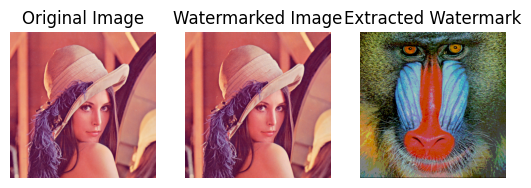

In [52]:
# 对一张彩色图像进行水印嵌入
img = watermark_embedding(img_path, watermark_path)
# 提取一张彩色图像中的水印
watermark = watermark_extraction(img)

# 使用plt显示图像
plt.figure()
plt.subplot(131)
plt.imshow(cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(132)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Watermarked Image')
plt.axis('off')

plt.subplot(133)
plt.imshow(cv2.cvtColor(watermark, cv2.COLOR_BGR2RGB))
plt.title('Extracted Watermark')
plt.axis('off')

plt.show()
